In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from straight_walking_speed import plot_straight_walking_speed
from os.path import join as oj

In [20]:
animal = 'RRM026'
session = 'Day151'
root_folder = '/Users/yang/Documents/Wilbrecht_Lab/sleap_video/preprocessed_data'

animal_folder_path = oj(root_folder, animal)

dataframes = []

# Check if the animal folder exists
if os.path.isdir(animal_folder_path):
    # Loop through each file in the animal folder
    for filename in os.listdir(animal_folder_path):
        if filename.startswith(f'{animal}_{session}') and filename.endswith('_processed.csv'):
            file_path = oj(animal_folder_path, filename)
            df = pd.read_csv(file_path, index_col=0)
            dataframes.append(df)
else:
    print('No matching animal folder found.')

if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
else:
    print("No matching files found.")


In [21]:
print(combined_df.shape)
combined_df.head()


(19338, 36)


,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Torso displacement,Tailhead displacement,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration
0,208.496017,207.609299,209.361526,212.309525,212.438141,221.540527,212.575073,232.636261,287.950099,133.633300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6064.396185,5727.000982,5535.907371,5493.053382
1,208.619156,200.945724,209.262909,207.435654,212.220200,216.801025,212.341431,228.085648,288.274896,126.902915,...,6.151008,6.103393,202.146539,190.900033,184.530246,183.101779,-99.193147,267.637570,82.136082,527.962948
2,209.288528,195.719864,211.798630,200.369705,212.055038,209.738297,209.340759,221.232346,288.880094,120.302599,...,6.242271,6.690018,198.840101,199.821285,187.268115,200.700544,-18.188992,-163.949653,-134.550875,-213.796058
3,209.621704,189.086411,211.922363,195.634048,211.851868,204.903351,209.093002,216.047729,289.176722,113.701467,...,6.092770,6.452467,198.233802,194.356297,182.783086,193.574009,-48.122119,225.630988,25.270673,-35.126554
4,209.038361,183.814789,209.420197,188.588608,211.750595,199.974030,209.532379,209.516830,288.832749,107.156175,...,6.120848,6.413437,196.629731,201.877330,183.625442,192.403124,-54.160718,-132.200435,246.731283,-172.642358


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

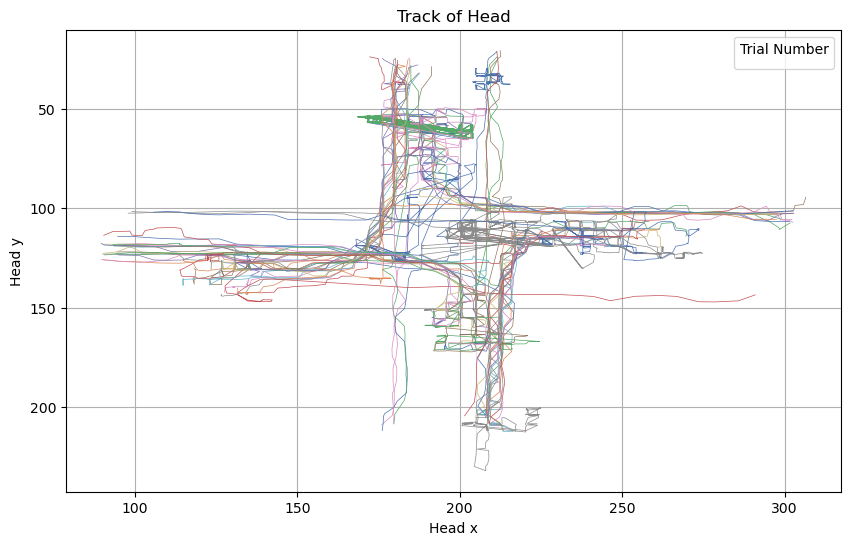

In [22]:
# Define the start and stop frames
start_frame, stop_frame = 0, 19000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='Head x',
        y='Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

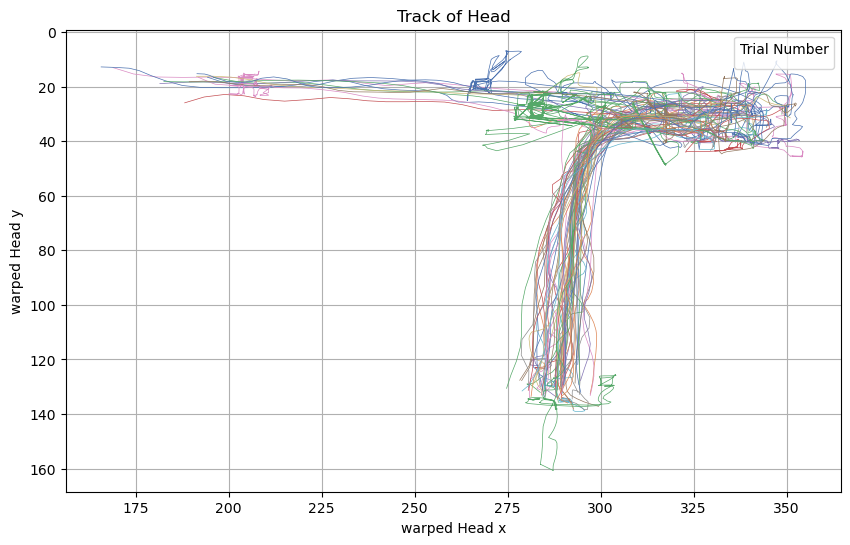

In [23]:
# Define the start and stop frames
start_frame, stop_frame = 0, 10000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='warped Head x',
        y='warped Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


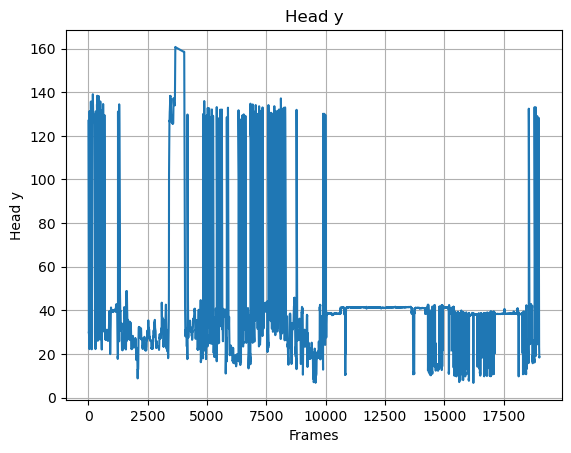

In [24]:

plot_df = combined_df[1:19000]
sns.lineplot(data=plot_df, x=plot_df.index, y='warped Head y')
plt.title('Head y')
plt.xlabel('Frames')
plt.ylabel('Head y')
#plt.xlim(0, )
plt.grid(True)
plt.show()


In [25]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

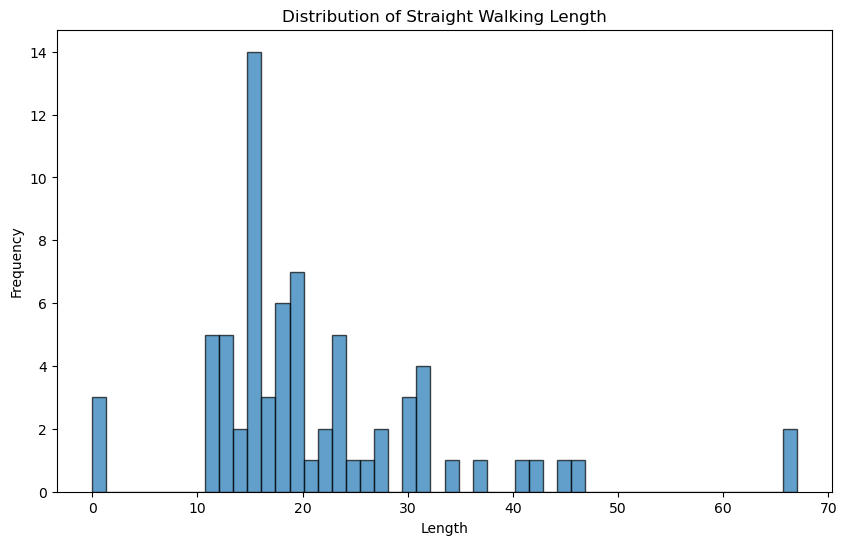

In [26]:
current_trial_num = np.nan
current_decision = np.nan
decision = np.nan
length = 0

straight_walking_length = []
trials = []
current_trial_speeds = []
current_trial_coords = []

for index, row in combined_df.iterrows():
    trial_num = row['trial']
    decision = row['decision']
    speed = row['Head velocity']
    head_x = row['warped Head x']
    head_y = row['warped Head y']
    
    if not pd.isna(decision):
        current_decision = decision    
        
    if trial_num != current_trial_num: # End of current trial and start of a new trial
        if length < 100:
            straight_walking_length.append(length)
            current_decision = np.nan
            current_trial_num = trial_num
        length = 0
        
    if pd.isna(current_decision) and index != 0:
        if speed < 300:
            length += 1

straight_walking_length_df = pd.DataFrame(straight_walking_length)
plt.figure(figsize=(10, 6))
plt.hist(straight_walking_length_df, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Straight Walking Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [27]:
def get_trial_profile(df, speed_threshold=500, speed_length=12, coord_length=13):
    """
    Extracts the straight walking speed curve, trajectory, average speed, and final decision for each trial.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the labeled data with decisions.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    length_threshold (int): The target length for normalization of speed profiles. Profiles shorter than this are excluded.
    coord_length (int): The number of coordinate points to extract before each decision.
    
    Returns:
    pandas.DataFrame: A DataFrame with each row representing a trial, containing columns
                      for the trial number, speed profile, coordinate data, and the final decision.
    """
    current_trial_num = np.nan
    current_decision = np.nan
    decision = np.nan
    
    trials = []
    current_trial_speeds = []
    current_trial_coords = []

    for index, row in df.iterrows():
        trial_num = row['trial']
        decision = row['decision']
        speed = row['Head velocity']
        head_x = row['warped Head x']
        head_y = row['warped Head y']
        
        if not pd.isna(decision):
            current_decision = decision    
            
        if trial_num != current_trial_num: # End of current trial and start of a new trial
            
            if len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
                # Use the last `speed_length` frames of speed values and `coord_length` frames of coordinates as the profile
                normalized_speeds = current_trial_speeds[-speed_length:]
                normalized_coords = current_trial_coords[-(coord_length * 2):]
                x1, y1 = normalized_coords[0], normalized_coords[1]
                x2, y2 = normalized_coords[-2], normalized_coords[-1]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                average_speed = distance / ((coord_length - 1) / 30)
                trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
                
            current_trial_speeds = []
            current_trial_coords = []
            current_decision = np.nan
            current_trial_num = trial_num

        if pd.isna(current_decision) and index != 0:
            if speed < speed_threshold:
                current_trial_speeds.append(speed)
                current_trial_coords.append(head_x)
                current_trial_coords.append(head_y)
        
    # Handle the final trial
    if not pd.isna(current_decision) and len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
        normalized_speeds = current_trial_speeds[-speed_length:]
        normalized_coords = current_trial_coords[-(coord_length * 2):]
        x1, y1 = normalized_coords[0], normalized_coords[1]
        x2, y2 = normalized_coords[-2], normalized_coords[-1]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        average_speed = distance / ((coord_length - 1) / 30)
        trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
    
    # Convert the list of trials to a DataFrame with appropriate column names
    speed_profiles = [t[0] for t in trials]
    coord_profiles = [t[1] for t in trials]
    decisions = [t[2] for t in trials]
    average_speeds = [t[3] for t in trials]

    # Flatten coordinate profiles into individual columns
    coord_columns = [f'x {i//2+1}' if i % 2 == 0 else f'y {i//2+1}' for i in range(coord_length * 2)]
    
    profiles_df = pd.DataFrame(speed_profiles, columns=[f'speed {i+1}' for i in range(speed_length)])
    coords_df = pd.DataFrame(coord_profiles, columns=coord_columns)
    
    profiles_df['final decision'] = decisions
    profiles_df['average speed'] = average_speeds
    final_df = pd.concat([profiles_df, coords_df], axis=1)

    return final_df

In [28]:
straight_walking_speed_profiles = get_trial_profile(combined_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])


In [30]:
# plot the coorelation between decision and speed
def plot_decision_composition(df, column, window_size=50, step_size=10):
    """
    Plots the composition of different decisions in different average speed intervals using a line graph with MSE.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing 'average_speed' and 'final_decision' columns.
    window_size (int): The size of the speed window.
    step_size (int): The step size for the sliding window.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Define speed intervals using a sliding window
    max_speed = df_copy[column].max()
    min_speed = df_copy[column].min()
    speed_intervals = np.arange(min_speed, max_speed + step_size, step_size)

    proportions = []
    
    for i in range(len(speed_intervals) - 1):
        lower_bound = speed_intervals[i]
        upper_bound = lower_bound + window_size
        interval_data = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] < upper_bound)]
        
        if len(interval_data) > 0:
            interval_composition = interval_data['final decision'].value_counts(normalize=True)
            proportions.append(interval_composition)
            
        else:
            proportions.append(pd.Series())
    # Create a DataFrame for the proportions
    proportions_df = pd.DataFrame(proportions, index=speed_intervals[:-1])

    # Plot the line graph with MSE error bars
    plt.figure(figsize=(10, 6))
    for decision in proportions_df.columns:
        plt.errorbar(proportions_df.index, proportions_df[decision], label=decision)
    
    plt.xlabel(column)
    plt.ylabel('Proportion of Decisions')
    plt.title('Composition of Decisions in Different Average Speed Intervals')
    plt.legend(title='Decision')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

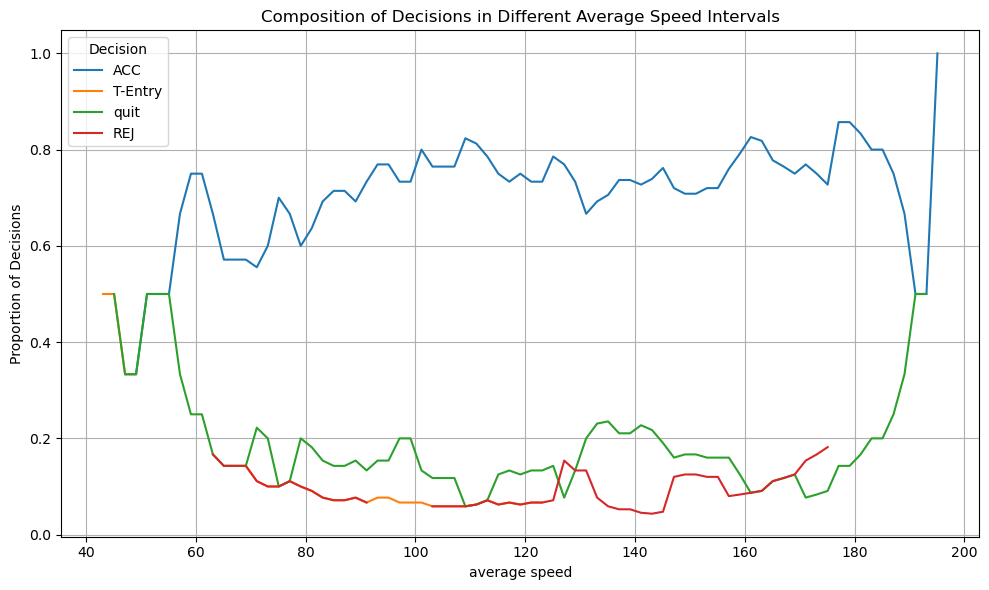

In [41]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


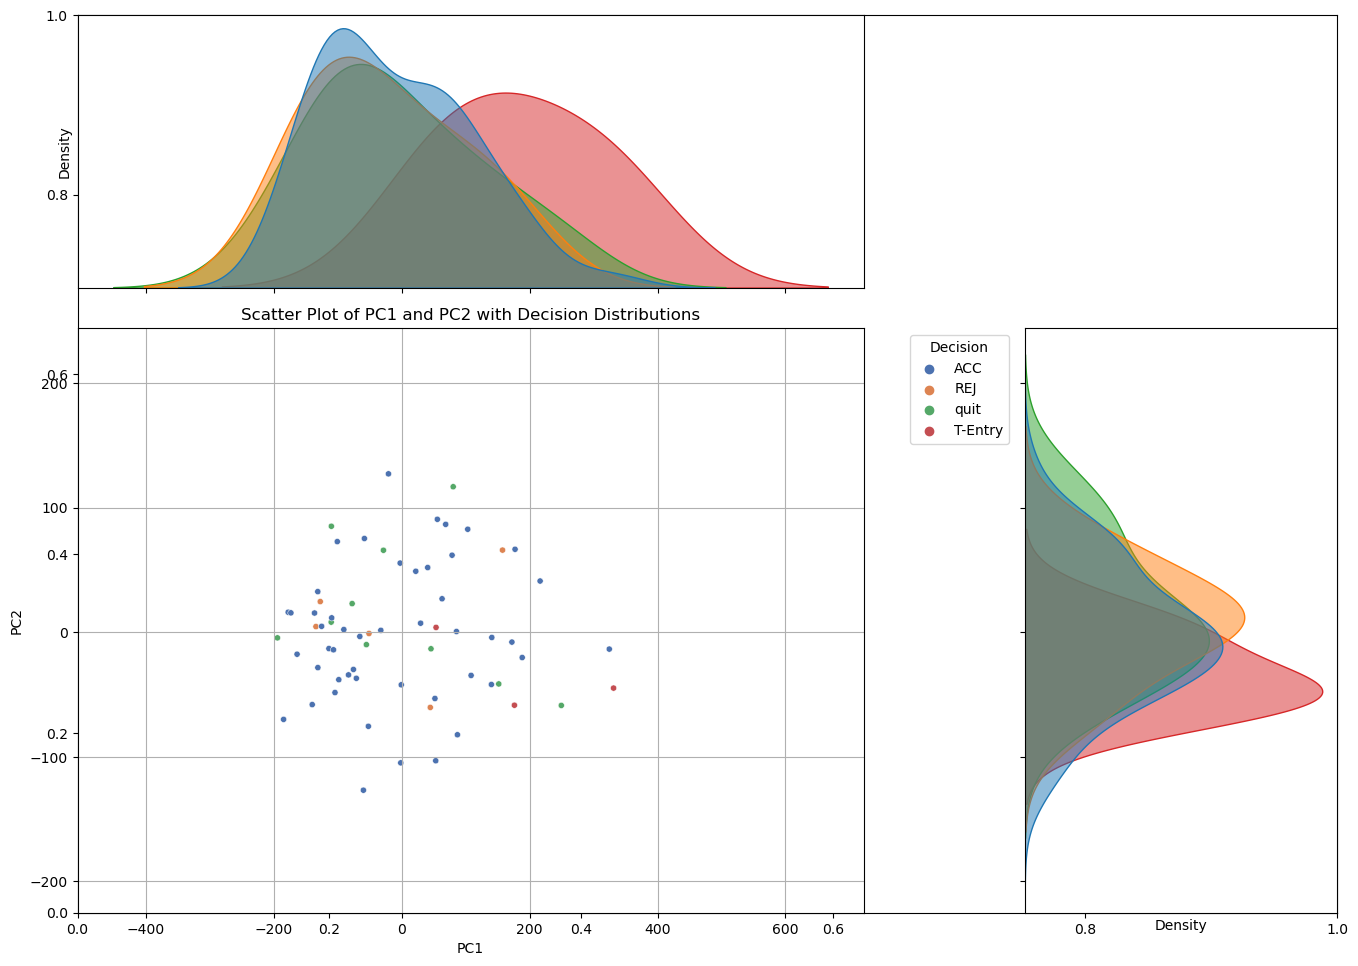

In [32]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)


"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# New Code: Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 10))

# New Code: Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(3, 3, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# New Code: Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=20, ax=main_ax)
main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = -0.140 * speed 1 + -0.184 * speed 2 + -0.193 * speed 3 + -0.236 * speed 4 + -0.264 * speed 5 + -0.322 * speed 6 + -0.337 * speed 7 + -0.360 * speed 8 + -0.358 * speed 9 + -0.360 * speed 10 + -0.328 * speed 11 + -0.266 * speed 12


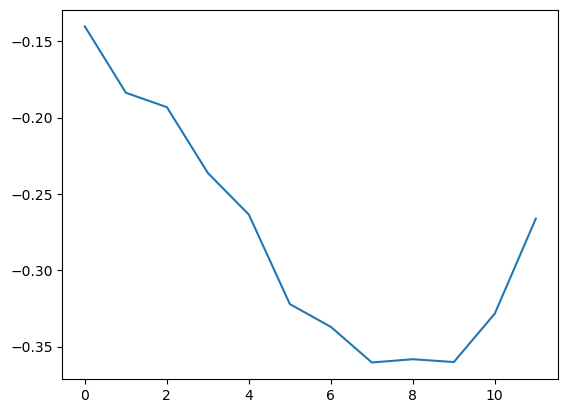

In [33]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


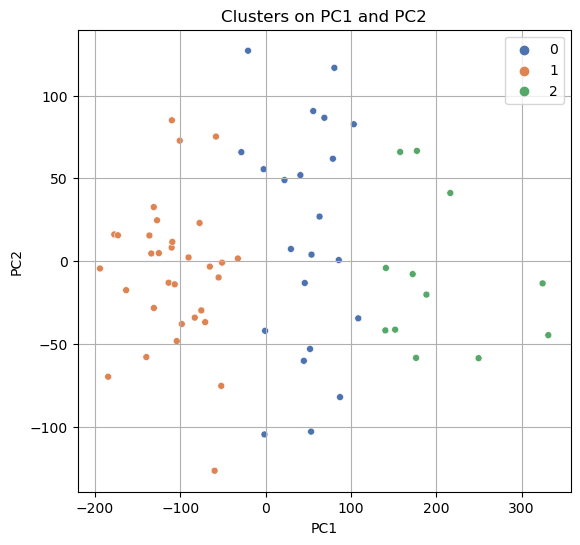

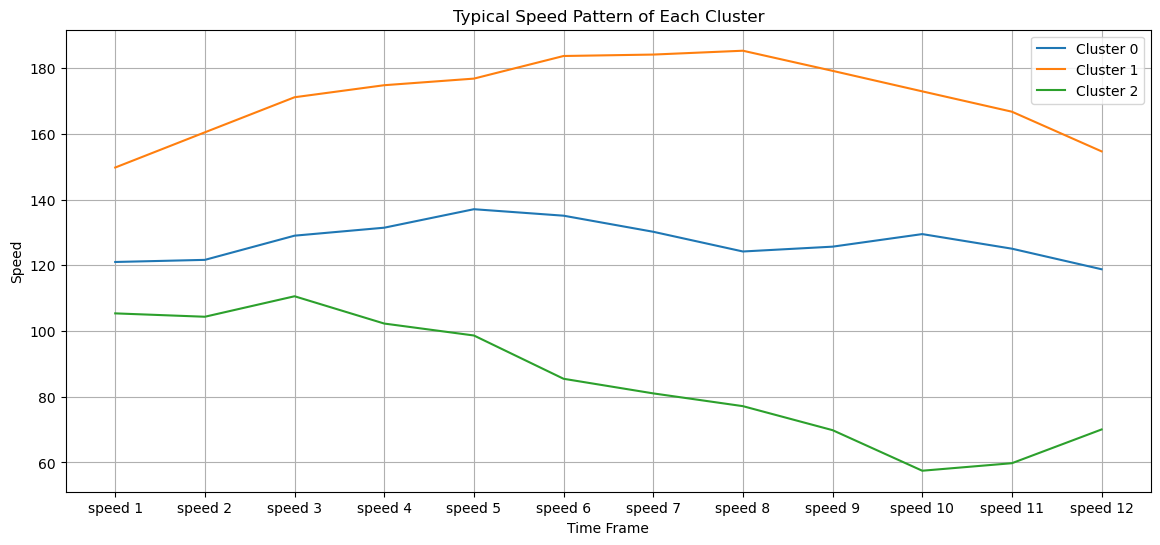

In [34]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x {i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y {i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

In [36]:
straight_walking_speed_profiles.describe()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x 10,y 10,x 11,y 11,x 12,y 12,x 13,y 13,slope,intercept
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,132.117226,137.341749,146.105962,147.181312,149.370057,149.655246,147.425477,145.285401,141.477285,137.481259,...,292.779303,60.593183,293.564226,56.154706,294.428998,51.861055,295.384482,47.789508,-0.105420,299.383934
std,37.028815,35.658830,34.247588,37.872148,38.681501,44.103046,45.328329,48.853507,48.707071,50.369190,...,2.548120,5.340171,2.327685,3.811885,2.215864,2.413222,2.095244,1.383834,0.079459,4.180810
min,37.994681,62.778639,76.813985,46.480120,33.157708,20.441936,2.445397,5.561730,5.678514,8.929517,...,287.091850,48.726448,288.631121,48.374244,289.475175,47.454265,289.584565,46.007345,-0.492002,291.818669
25%,106.398770,111.955475,120.692261,123.641811,120.055217,125.085707,121.683132,108.180668,101.641119,98.351966,...,291.376730,56.712508,292.459686,53.109588,293.097043,49.869290,294.116753,46.477065,-0.140050,297.165836
50%,139.571637,145.194878,152.986520,156.070956,154.767691,152.770360,151.077033,148.102403,151.555848,153.142694,...,293.081845,62.389780,293.498574,56.906737,294.360214,51.889803,295.524688,47.617629,-0.097512,299.357430
75%,154.216215,165.086950,170.398743,173.563142,175.924272,186.561247,182.147128,187.148863,183.545875,175.973968,...,294.123954,64.377443,295.231700,58.847822,296.272094,53.829566,296.944878,48.883694,-0.058595,301.207640
max,202.130374,205.895848,215.205468,207.720450,218.310139,222.653596,223.795887,220.724253,220.174870,215.560849,...,298.045355,70.712532,298.411692,63.871654,298.735072,57.134634,299.488384,50.894499,0.037985,317.058977


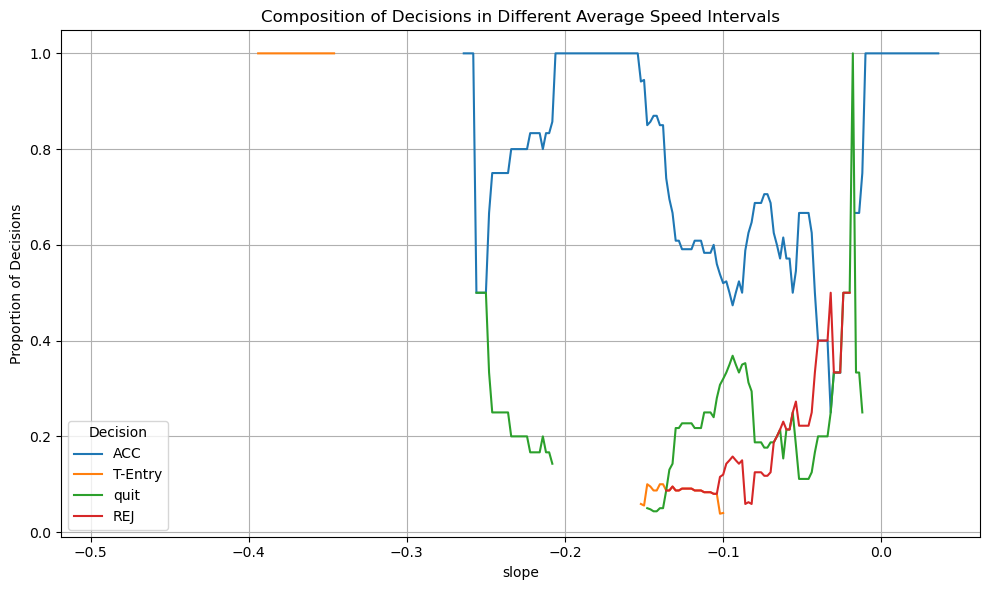

In [37]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.05, step_size=0.002)

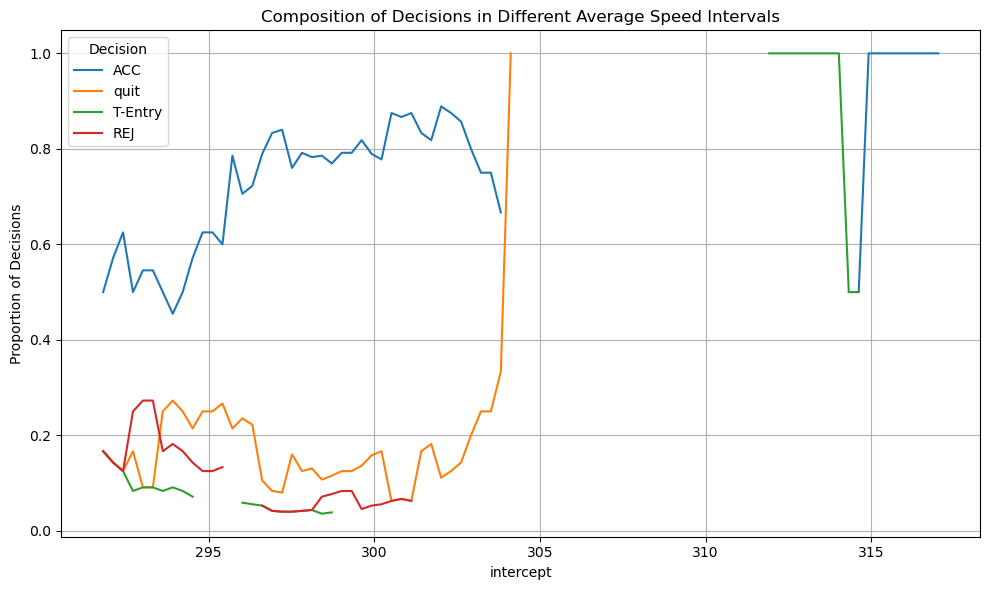

In [38]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=3, step_size=0.3)